# Visualiser for area28 metric data

In [24]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Import data as CSV / json file

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

# df = pd.read_json("data.json")
df = pd.read_csv("dummy.csv")
df = df.set_index('id')
df

,type,userId,sceneId,timestamp,data
id,,,,,
35c8906c-85ab-434d-9d7a-6c211ab746d2,CORE_SCENE_JOIN,2fba20f5-6353-4a69-9bb7-63335250f7f0,4af34850-9708-4366-b6ed-1e5377be73be,2021-10-04 11:22:53,"{'ratingValue': None, 'ratingCategory': None}"
848926b5-3654-4983-bd1f-e31b92e15420,CORE_SCENE_LEAVE,2fba20f5-6353-4a69-9bb7-63335250f7f0,4af34850-9708-4366-b6ed-1e5377be73be,2021-10-04 13:26:10,"{'ratingValue': None, 'ratingCategory': None}"
06f1611a-9b4f-4a95-88d2-93cc2605c042,CORE_SCENE_RATE,2fba20f5-6353-4a69-9bb7-63335250f7f0,4af34850-9708-4366-b6ed-1e5377be73be,2021-10-04 13:26:37,"{'ratingValue': 1, 'ratingCategory': 'Collab T..."
bc3e38df-e2c4-48a8-8266-25a796a1257e,CORE_SCENE_JOIN,7af8284d-5ebf-4e94-b561-4b92264f78b1,4af34850-9708-4366-b6ed-1e5377be73be,2021-10-04 10:25:11,"{'ratingValue': None, 'ratingCategory': None}"
4ac96285-75d4-457a-9d21-7571c828b134,CORE_SCENE_LEAVE,7af8284d-5ebf-4e94-b561-4b92264f78b1,4af34850-9708-4366-b6ed-1e5377be73be,2021-10-04 11:55:03,"{'ratingValue': None, 'ratingCategory': None}"
...,...,...,...,...,...
ab9f4f05-3af7-4f3d-886b-ad3b2bf4b4b5,CORE_SCENE_JOIN,60e93cfc-5f74-4d26-8769-42b3858143f8,40100e02-dea1-4910-b6fe-19c8f79f7c1a,2021-12-31 12:13:31,"{'ratingValue': None, 'ratingCategory': None}"
cb241852-7337-413e-8fef-5958cad8ddc1,CORE_SCENE_LEAVE,60e93cfc-5f74-4d26-8769-42b3858143f8,40100e02-dea1-4910-b6fe-19c8f79f7c1a,2021-12-31 13:42:12,"{'ratingValue': None, 'ratingCategory': None}"
f7fab08e-22c7-4b27-bb3b-c46e1987847d,CORE_SCENE_JOIN,e39e4015-17ed-4a22-9c3a-751fd3c4f808,40100e02-dea1-4910-b6fe-19c8f79f7c1a,2021-12-31 10:51:55,"{'ratingValue': None, 'ratingCategory': None}"


## Pre-process data to be visualised

In [5]:
import calendar

df_no_rating = df.drop(df[df['type'] == "CORE_SCENE_RATE"].index)

df_no_rating['datetime'] = [dt.datetime.strptime(str(d), '%Y-%m-%d %H:%M:%S') for d in df_no_rating['timestamp']]
durations = df_no_rating.groupby(['userId'])['datetime'].diff()
df_no_rating['date'] = [dt.datetime.date(d) for d in df_no_rating['datetime']] 
df_no_rating['time'] = [dt.datetime.time(d) for d in df_no_rating['datetime']]
df_no_rating['weekday'] = [calendar.day_name[d.weekday()] for d in df_no_rating['datetime']]
df_no_rating['week_number'] = [d.isocalendar()[1] for d in df_no_rating['datetime']]

df_no_rating['duration'] = durations
df_processed = df_no_rating[['userId', 'type', 'date', 'duration', 'time', 'weekday', 'week_number', 'sceneId']].copy()
df_processed = df_processed.dropna()
df_processed = df_processed.drop(df_processed[df_processed['type'] == 'CORE_SCENE_JOIN'].index)
df_processed

,userId,type,date,duration,time,weekday,week_number,sceneId
id,,,,,,,,
848926b5-3654-4983-bd1f-e31b92e15420,2fba20f5-6353-4a69-9bb7-63335250f7f0,CORE_SCENE_LEAVE,2021-10-04,0 days 02:03:17,13:26:10,Monday,40,4af34850-9708-4366-b6ed-1e5377be73be
4ac96285-75d4-457a-9d21-7571c828b134,7af8284d-5ebf-4e94-b561-4b92264f78b1,CORE_SCENE_LEAVE,2021-10-04,0 days 01:29:52,11:55:03,Monday,40,4af34850-9708-4366-b6ed-1e5377be73be
2672aa37-3f01-4200-8c12-0a8948b1a9a1,2314cb48-7a1f-4a81-a445-46b5d7d69d8f,CORE_SCENE_LEAVE,2021-10-04,0 days 02:19:14,15:39:35,Monday,40,4af34850-9708-4366-b6ed-1e5377be73be
fc35822a-aa89-4dae-8212-980e7e575c93,1305009a-5cb4-4ae6-9ad0-145d74347a36,CORE_SCENE_LEAVE,2021-10-04,0 days 02:06:32,12:47:46,Monday,40,4af34850-9708-4366-b6ed-1e5377be73be
52dc9b86-dd57-4692-924c-dfd80b057219,73f840f4-6fbd-48b3-80e6-81cb1120ec1e,CORE_SCENE_LEAVE,2021-10-04,0 days 03:25:06,16:19:53,Monday,40,4af34850-9708-4366-b6ed-1e5377be73be
...,...,...,...,...,...,...,...,...
253092d2-b3c7-4e1a-993e-e01bbe8bcd77,975f6d88-0f03-44e0-a753-68438e165e18,CORE_SCENE_LEAVE,2021-12-31,0 days 03:54:35,15:27:47,Friday,52,40100e02-dea1-4910-b6fe-19c8f79f7c1a
e40c9fae-3d48-4d8a-b13f-fe0458a74745,6fe32b84-dd79-4fff-981d-5e3afe8c214b,CORE_SCENE_LEAVE,2021-12-31,0 days 03:31:32,14:28:16,Friday,52,40100e02-dea1-4910-b6fe-19c8f79f7c1a
3f2351d0-aa78-40bd-8b90-649e8fc55b1d,91ce111a-d4dd-4d73-9707-834cbfc4fbb4,CORE_SCENE_LEAVE,2021-12-31,0 days 04:51:02,15:28:49,Friday,52,40100e02-dea1-4910-b6fe-19c8f79f7c1a


In [6]:
total_hours = df_processed['duration'].sum().days * 24 + df_processed['duration'].sum().seconds//3600
total_hours

1703

In [7]:
len(df['sceneId'].unique())

65

In [8]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install ipywidgets -q

import ipywidgets as widgets
from IPython.display import display

In [9]:
dropdown_timeframe = widgets.Dropdown(
       options=['Day', 'Week', 'Month', 'Year', 'All Time'],
       description='Timeframe:')

a = df['userId'].unique()
a = np.append(['All'], a)

dropdown_user = widgets.Dropdown(
       options=a,
       value='All',
       description='User ID(s):')
       
output_widget = widgets.Output()

today = dt.datetime.now()
timeframe_ago = dt.datetime(1970, 1, 1)


def dropdown_timeframe_eventhandler(change):
    common_filtering(change.new, dropdown_user.value)

def dropdown_user_eventhandler(change):
    common_filtering(dropdown_timeframe.value, change.new)
    
def common_filtering(timeframe, user):
    output_widget.clear_output()
    
    #timeframe
    if timeframe == 'Day':
        timeframe_ago = dt.datetime(today.year, today.month, day=today.day)
    elif timeframe == 'Week':
        idx = (today.weekday() + 1) % 7 # MON = 0, SUN = 6 -> SUN = 0 .. SAT = 6
        last_sun = today - dt.timedelta(7+idx-6)
        timeframe_ago = dt.datetime(last_sun.year, last_sun.month, day=last_sun.day)
    elif timeframe == 'Month':
        timeframe_ago = dt.datetime(today.year, today.month, day=1)
    elif timeframe == 'Year':
        timeframe_ago = dt.datetime(today.year, 1, day=1)
    else:
        timeframe_ago = dt.datetime(1970, 1, 1)
    df_processed_timeframed = df_processed.drop(df_processed[df_processed.date < timeframe_ago.date()].index)
    df_timeframed = df.drop(df[pd.to_datetime(df.timestamp) < timeframe_ago].index)
    df_timeframed['week_number'] = [dt.datetime.strptime(str(d), '%Y-%m-%d %H:%M:%S').isocalendar()[1] for d in df_timeframed['timestamp']]
    
    #user
    df_processed_user_timeframed = df_processed_timeframed
    df_user_timeframed = df_timeframed
    
    if user != 'All':
        dftemp = df_processed_timeframed
        df_processed_user_timeframed = dftemp.drop(dftemp[dftemp.userId != str(user)].index)
        df_user_timeframed = df_timeframed.drop(df_timeframed[df_timeframed.userId != str(user)].index)
    
    with output_widget:
        display(df_processed_user_timeframed)

dropdown_timeframe.observe(dropdown_timeframe_eventhandler, names='value')
dropdown_user.observe(dropdown_user_eventhandler, names='value')
display(dropdown_timeframe)
display(dropdown_user)

Dropdown(description='Timeframe:', options=('Day', 'Week', 'Month', 'Year', 'All Time'), value='Day')

Dropdown(description='User ID(s):', options=('All', '2fba20f5-6353-4a69-9bb7-63335250f7f0', '7af8284d-5ebf-4e9…

In [10]:
display(output_widget)

Output()

## Activity heatmap

In [11]:
from pandas import DataFrame
import seaborn as sns
import time

ModuleNotFoundError: No module named 'seaborn'

In [12]:
dropdown_timeframe_hm = widgets.Dropdown(
       options=['Day', 'Week', 'Month', 'Year', 'All Time'],
       description='Timeframe:')

a = df['userId'].unique()
a = np.append(['All'], a)

dropdown_user_hm = widgets.Dropdown(
       options=a,
       value='All',
       description='User ID(s):')
       
output_heatmap_widget = widgets.Output()

today = dt.datetime.now()
timeframe_ago = dt.datetime(1970, 1, 1)


def dropdown_timeframe_eventhandler_hm(change):
    common_filtering_hm(change.new, dropdown_user_hm.value)

def dropdown_user_eventhandler_hm(change):
    common_filtering_hm(dropdown_timeframe_hm.value, change.new)
    
def common_filtering_hm(timeframe, user):
    output_heatmap_widget.clear_output()
    
    #timeframe
    if timeframe == 'Day':
        timeframe_ago = dt.datetime(today.year, today.month, day=today.day)
    elif timeframe == 'Week':
        idx = (today.weekday() + 1) % 7 # MON = 0, SUN = 6 -> SUN = 0 .. SAT = 6
        last_sun = today - dt.timedelta(7+idx-6)
        timeframe_ago = dt.datetime(last_sun.year, last_sun.month, day=last_sun.day)
    elif timeframe == 'Month':
        timeframe_ago = dt.datetime(today.year, today.month, day=1)
    elif timeframe == 'Year':
        timeframe_ago = dt.datetime(today.year, 1, day=1)
    else:
        timeframe_ago = dt.datetime(1970, 1, 1)
    df_processed_timeframed = df_processed.drop(df_processed[df_processed.date < timeframe_ago.date()].index)
    df_timeframed = df.drop(df[pd.to_datetime(df.timestamp) < timeframe_ago].index)
    df_timeframed['week_number'] = [dt.datetime.strptime(str(d), '%Y-%m-%d %H:%M:%S').isocalendar()[1] for d in df_timeframed['timestamp']]
    
    #user
    df_processed_user_timeframed = df_processed_timeframed
    df_user_timeframed = df_timeframed
    
    if user != 'All':
        dftemp = df_processed_timeframed
        df_processed_user_timeframed = dftemp.drop(dftemp[dftemp.userId != str(user)].index)
        df_user_timeframed = df_timeframed.drop(df_timeframed[df_timeframed.userId != str(user)].index)
    
    with output_heatmap_widget:
        df_processed_user_timeframed['seconds'] = [d.total_seconds() for d in df_processed_user_timeframed['duration']]
        df_processed_groupedbyID = pd.DataFrame({'seconds' : df_processed_user_timeframed.groupby(['week_number', 'weekday'])['seconds'].sum()}).reset_index()
        df_heatmap = df_processed_groupedbyID.pivot(index='weekday', columns='week_number', values='seconds')
        df_heatmap.index = pd.CategoricalIndex(df_heatmap.index, categories= ['Saturday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday'])
        df_heatmap.sort_index(level=0, inplace=True)

        mask = df_heatmap.isnull()
        sns.heatmap(df_heatmap, annot=False, fmt="g", cmap='crest', mask=mask)
        plt.show()

dropdown_timeframe_hm.observe(dropdown_timeframe_eventhandler_hm, names='value')
dropdown_user_hm.observe(dropdown_user_eventhandler_hm, names='value')
display(dropdown_timeframe_hm)
display(dropdown_user_hm)

Dropdown(description='Timeframe:', options=('Day', 'Week', 'Month', 'Year', 'All Time'), value='Day')

Dropdown(description='User ID(s):', options=('All', '2fba20f5-6353-4a69-9bb7-63335250f7f0', '7af8284d-5ebf-4e9…

In [13]:
display(output_heatmap_widget)

Output()

# Pie chart of time spent in different scenes

In [14]:
dropdown_timeframe_timespent = widgets.Dropdown(
       options=['Day', 'Week', 'Month', 'Year', 'All Time'],
       description='Timeframe:')

a = df['userId'].unique()
a = np.append(['All'], a)

dropdown_user_timespent = widgets.Dropdown(
       options=a,
       value='All',
       description='User ID(s):')
       
output_widget_timespent = widgets.Output()

today = dt.datetime.now()
timeframe_ago = dt.datetime(1970, 1, 1)


def dropdown_timeframe_eventhandler_timespent(change):
    common_filtering_timespent(change.new, dropdown_user_timespent.value)

def dropdown_user_eventhandler_timespent(change):
    common_filtering_timespent(dropdown_timeframe_timespent.value, change.new)
    
def common_filtering_timespent(timeframe, user):
    output_widget_timespent.clear_output()
    
    #timeframe
    if timeframe == 'Day':
        timeframe_ago = dt.datetime(today.year, today.month, day=today.day)
    elif timeframe == 'Week':
        idx = (today.weekday() + 1) % 7 # MON = 0, SUN = 6 -> SUN = 0 .. SAT = 6
        last_sun = today - dt.timedelta(7+idx-6)
        timeframe_ago = dt.datetime(last_sun.year, last_sun.month, day=last_sun.day)
    elif timeframe == 'Month':
        timeframe_ago = dt.datetime(today.year, today.month, day=1)
    elif timeframe == 'Year':
        timeframe_ago = dt.datetime(today.year, 1, day=1)
    else:
        timeframe_ago = dt.datetime(1970, 1, 1)
    df_processed_timeframed = df_processed.drop(df_processed[df_processed.date < timeframe_ago.date()].index)
    df_timeframed = df.drop(df[pd.to_datetime(df.timestamp) < timeframe_ago].index)
    df_timeframed['week_number'] = [dt.datetime.strptime(str(d), '%Y-%m-%d %H:%M:%S').isocalendar()[1] for d in df_timeframed['timestamp']]
    
    #user
    df_processed_user_timeframed = df_processed_timeframed
    df_user_timeframed = df_timeframed
    
    if user != 'All':
        dftemp = df_processed_timeframed
        df_processed_user_timeframed = dftemp.drop(dftemp[dftemp.userId != str(user)].index)
        df_user_timeframed = df_timeframed.drop(df_timeframed[df_timeframed.userId != str(user)].index)
    
    with output_widget_timespent:
        df_sessions = pd.DataFrame({'duration' : df_processed_user_timeframed.groupby( [ "sceneId"] )['duration'].sum()}).reset_index()
        df_sessions['duration_sec'] = [d.total_seconds() for d in df_sessions['duration']]
        plot = df_sessions.plot.pie(y='duration_sec', x='sceneId', figsize=(5, 5))
        display(df_sessions)

dropdown_timeframe_timespent.observe(dropdown_timeframe_eventhandler_timespent, names='value')
dropdown_user_timespent.observe(dropdown_user_eventhandler_timespent, names='value')
display(dropdown_timeframe_timespent)
display(dropdown_user_timespent)

Dropdown(description='Timeframe:', options=('Day', 'Week', 'Month', 'Year', 'All Time'), value='Day')

Dropdown(description='User ID(s):', options=('All', '2fba20f5-6353-4a69-9bb7-63335250f7f0', '7af8284d-5ebf-4e9…

In [15]:
display(output_widget_timespent)

Output()

### Bar Chart showing how long users spent in sessions

In [16]:
dropdown_timeframe_timespentsess = widgets.Dropdown(
       options=['Day', 'Week', 'Month', 'Year', 'All Time'],
       description='Timeframe:')

a = df['userId'].unique()
a = np.append(['All'], a)

dropdown_user_timespentsess = widgets.Dropdown(
       options=a,
       value='All',
       description='User ID(s):')
       
output_widget_timespentsess = widgets.Output()

today = dt.datetime.now()
timeframe_ago = dt.datetime(1970, 1, 1)


def dropdown_timeframe_eventhandler_timespentsess(change):
    common_filtering_timespentsess(change.new, dropdown_user_timespentsess.value)

def dropdown_user_eventhandler_timespentsess(change):
    common_filtering_timespentsess(dropdown_timeframe_timespentsess.value, change.new)
    
def common_filtering_timespentsess(timeframe, user):
    output_widget_timespentsess.clear_output()
    
    #timeframe
    if timeframe == 'Day':
        timeframe_ago = dt.datetime(today.year, today.month, day=today.day)
    elif timeframe == 'Week':
        idx = (today.weekday() + 1) % 7 # MON = 0, SUN = 6 -> SUN = 0 .. SAT = 6
        last_sun = today - dt.timedelta(7+idx-6)
        timeframe_ago = dt.datetime(last_sun.year, last_sun.month, day=last_sun.day)
    elif timeframe == 'Month':
        timeframe_ago = dt.datetime(today.year, today.month, day=1)
    elif timeframe == 'Year':
        timeframe_ago = dt.datetime(today.year, 1, day=1)
    else:
        timeframe_ago = dt.datetime(1970, 1, 1)
    df_processed_timeframed = df_processed.drop(df_processed[df_processed.date < timeframe_ago.date()].index)
    df_timeframed = df.drop(df[pd.to_datetime(df.timestamp) < timeframe_ago].index)
    df_timeframed['week_number'] = [dt.datetime.strptime(str(d), '%Y-%m-%d %H:%M:%S').isocalendar()[1] for d in df_timeframed['timestamp']]
    
    #user
    df_processed_user_timeframed = df_processed_timeframed
    df_user_timeframed = df_timeframed
    
    if user != 'All':
        dftemp = df_processed_timeframed
        df_processed_user_timeframed = dftemp.drop(dftemp[dftemp.userId != str(user)].index)
        df_user_timeframed = df_timeframed.drop(df_timeframed[df_timeframed.userId != str(user)].index)
    
    with output_widget_timespentsess:
        fig = plt.figure()
        ax = fig.add_axes([0,0,1,1])
        ax.set_ylabel('Time spent in sessions')
        ax.set_xlabel('User ID')
        ax.bar(df_processed_timeframed['userId'], df_processed_timeframed['duration'])
        display(df_processed_timeframed)

dropdown_timeframe_timespentsess.observe(dropdown_timeframe_eventhandler_timespentsess, names='value')
dropdown_user_timespentsess.observe(dropdown_user_eventhandler_timespentsess, names='value')
display(dropdown_timeframe_timespentsess)
display(dropdown_user_timespentsess)

Dropdown(description='Timeframe:', options=('Day', 'Week', 'Month', 'Year', 'All Time'), value='Day')

Dropdown(description='User ID(s):', options=('All', '2fba20f5-6353-4a69-9bb7-63335250f7f0', '7af8284d-5ebf-4e9…

In [17]:
display(output_widget_timespentsess)

Output()

## Cells to verify unit tests for frontend ui skeleton

In [18]:
df_processed.loc[df_processed['sceneId'] == '0c6ed35f-e825-47ac-aa10-c8e3f82ce55c']['duration']

Series([], Name: duration, dtype: timedelta64[ns])

In [26]:
total_duration = df_processed.loc[df_processed['date'] == dt.datetime.now()]['duration'].sum()
total_duration

Timedelta('0 days 00:00:00')

In [27]:
total_hours = total_duration.days * 24 + total_duration.seconds / 3600
total_hours

0.0

In [75]:
# get hours spent per timeframe
df_asd = df_processed[['duration', 'date']].copy()
df_asd['week'] = pd.DatetimeIndex(df_asd['date']).week
df_asd = df_asd.groupby("week").sum()
df_asd['duration_secs'] = [(d.days * 24 * 3600 + d.seconds) for d in df_asd['duration']]
df_asd['duration_hours'] = [(d / 3600) for d in df_asd['duration_secs']]\
df_asd

,duration,duration_secs,duration_hours
week,,,
40,4 days 21:30:02,423002,117.500556
41,6 days 00:22:32,519752,144.375556
42,5 days 01:36:37,437797,121.610278
43,5 days 13:33:18,480798,133.555000
44,5 days 02:38:55,441535,122.648611
45,6 days 00:11:55,519115,144.198611
46,6 days 07:16:23,544583,151.273056
47,5 days 02:33:00,441180,122.550000
48,5 days 02:32:28,441148,122.541111


In [74]:
# getting unique usersIDs or sceneIDs
df_asd = df_processed[['userId', 'date']].copy()
df_asd['week'] = pd.DatetimeIndex(df_asd['date']).week
df_asd = df_asd.sort_values('week', ascending=False)
df_week = df_asd[df_asd['week'] == 52]
len(df_week['userId'].unique())

10

In [73]:
df_asd = df_processed[['userId', 'duration']].copy()
df_asd = df_asd.groupby("userId").sum()
df_asd['duration_hrs'] = [((d.days * 24 * 3600 + d.seconds) / 3600) for d in df_asd['duration']]
df_asd = df_asd.sort_values('duration_hrs', ascending=False)
df_asd.head()

,duration,duration_hrs
userId,,
f1f86bb6-27b3-4c1a-ba2b-d885c9ca2d12,4 days 05:02:19,101.038611
a36d2bd7-92b8-4e91-8c85-62b1cfee37cc,4 days 04:34:55,100.581944
21d90da3-1e56-4c5d-ba80-cb099df1db34,4 days 03:10:23,99.173056
ef7f50d4-c6b2-4f19-af72-c6e8a6b9f7b2,3 days 21:16:01,93.266944
c5673ecc-a571-4cc6-8d44-dba17d755377,3 days 20:53:41,92.894722


In [70]:
df_scenes_grouped = df_processed[['sceneId', 'type', 'date']].copy()

df_scenes_grouped['month'] = [d.month for d in df_scenes_grouped['date']]

df_scenes_grouped = df_scenes_grouped.groupby('month').nunique()
df_scenes_grouped

,sceneId,type,date
month,,,
10,20,1,20
11,16,1,16


In [71]:
df_scenes_grouped = df_processed[['userId', 'date']].copy()

df_scenes_grouped['month'] = [d.month for d in df_scenes_grouped['date']]

df_scenes_grouped = df_scenes_grouped.groupby('month').nunique()
df_scenes_grouped

,userId,date
month,,
10,10,20
11,10,16


In [74]:
df_scenes_grouped = df_processed[['duration', 'date']].copy()

df_scenes_grouped['month'] = [d.month for d in df_scenes_grouped['date']]
df_scenes_grouped['duration_hrs'] = [((d.days * 24 * 3600 + d.seconds) / 3600) for d in df_scenes_grouped['duration']]

df_scenes_grouped = df_scenes_grouped.groupby('month').sum()
df_scenes_grouped

,duration_hrs
month,
10,490.389167
11,415.655556


## Show ratings of users


In [44]:
dropdown_timeframe_ratings = widgets.Dropdown(
       options=['Day', 'Week', 'Month', 'Year', 'All Time'],
       description='Timeframe:')

a = df['userId'].unique()
a = np.append(['All'], a)

dropdown_user_ratings = widgets.Dropdown(
       options=a,
       value='All',
       description='User ID(s):')
       
output_widget_ratings = widgets.Output()

today = dt.datetime.now()
timeframe_ago = dt.datetime(1970, 1, 1)


def dropdown_timeframe_eventhandler_ratings(change):
    common_filtering_ratings(change.new, dropdown_user_ratings.value)

def dropdown_user_eventhandler_ratings(change):
    common_filtering_ratings(dropdown_timeframe_ratings.value, change.new)
    
def common_filtering_ratings(timeframe, user):
    output_widget_ratings.clear_output()
    
    #timeframe
    if timeframe == 'Day':
        timeframe_ago = dt.datetime(today.year, today.month, day=today.day)
    elif timeframe == 'Week':
        idx = (today.weekday() + 1) % 7 # MON = 0, SUN = 6 -> SUN = 0 .. SAT = 6
        last_sun = today - dt.timedelta(7+idx-6)
        timeframe_ago = dt.datetime(last_sun.year, last_sun.month, day=last_sun.day)
    elif timeframe == 'Month':
        timeframe_ago = dt.datetime(today.year, today.month, day=1)
    elif timeframe == 'Year':
        timeframe_ago = dt.datetime(today.year, 1, day=1)
    else:
        timeframe_ago = dt.datetime(1970, 1, 1)
    df_processed_timeframed = df_processed.drop(df_processed[df_processed.date < timeframe_ago.date()].index)
    df_timeframed = df.drop(df[pd.to_datetime(df.timestamp) < timeframe_ago].index)
    df_timeframed['week_number'] = [dt.datetime.strptime(str(d), '%Y-%m-%d %H:%M:%S').isocalendar()[1] for d in df_timeframed['timestamp']]
    
    #user
    df_processed_user_timeframed = df_processed_timeframed
    df_user_timeframed = df_timeframed
    
    if user != 'All':
        dftemp = df_processed_timeframed
        df_processed_user_timeframed = dftemp.drop(dftemp[dftemp.userId != str(user)].index)
        df_user_timeframed = df_timeframed.drop(df_timeframed[df_timeframed.userId != str(user)].index)
    
    with output_widget_ratings:
        df_rating = df_user_timeframed.drop(df_user_timeframed[df_user_timeframed['type'] != "CORE_SCENE_RATE"].index)
        df_rating['data_str'] = [ast.literal_eval(str(d)) for d in df_rating['data']]
        df_rating['ratingValue'] = [d['ratingValue'] for d in df_rating['data_str']]
        df_rating['ratingCategory'] = [d['ratingCategory'] for d in df_rating['data_str']]
        df_rating = df_rating.drop('data', axis=1)
        df_rating = df_rating.drop('data_str', axis=1)
        df_rating_grouped = pd.DataFrame({'temp' : df_rating.groupby(["ratingValue"])['type']}).reset_index()
        df_rating_grouped['count'] = [len(d[1]) for d in df_rating_grouped['temp']]
        df_rating_grouped = df_rating_grouped.drop('temp', axis=1)
        df_rating_grouped.columns = ['ratingValue', 'count']
        plot = df_rating_grouped.plot.pie(y='count', figsize=(5, 5))
        display(plot)

dropdown_timeframe_ratings.observe(dropdown_timeframe_eventhandler_ratings, names='value')
dropdown_user_ratings.observe(dropdown_user_eventhandler_ratings, names='value')
display(dropdown_timeframe_ratings)
display(dropdown_user_ratings)

Dropdown(description='Timeframe:', options=('Day', 'Week', 'Month', 'Year', 'All Time'), value='Day')

Dropdown(description='User ID(s):', options=('All', '12367640-999d-4dc8-b121-ecb7f144071a', 'f1f86bb6-27b3-4c1…

# Histograms

## Histogram showing concurrent users throughout an average day

Dropdown(description='Timeframe:', options=('Day', 'Week', 'Month', 'Year', 'All Time'), value='Day')

Dropdown(description='User ID(s):', options=('All', '12367640-999d-4dc8-b121-ecb7f144071a', 'f1f86bb6-27b3-4c1…

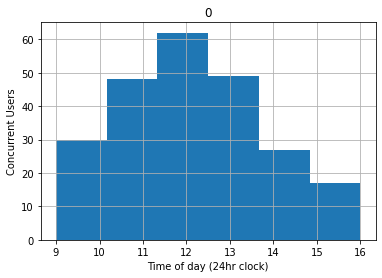

In [45]:
dropdown_timeframe_hist = widgets.Dropdown(
       options=['Day', 'Week', 'Month', 'Year', 'All Time'],
       description='Timeframe:')

a = df['userId'].unique()
a = np.append(['All'], a)

dropdown_user_hist = widgets.Dropdown(
       options=a,
       value='All',
       description='User ID(s):')
       
output_widget_hist = widgets.Output()

today = dt.datetime.now()
timeframe_ago = dt.datetime(1970, 1, 1)


def dropdown_timeframe_eventhandler_hist(change):
    common_filtering_hist(change.new, dropdown_user_hist.value)

def dropdown_user_eventhandler_hist(change):
    common_filtering_hist(dropdown_timeframe_hist.value, change.new)
    
def get_times_active(row):
    end = row['time'].hour
    start = row['time'].hour - row['duration'].seconds//3600
    return_set = set()
    for i in range(end - start + 1):
        return_set.add(str(start + i))
    return return_set

def common_filtering_hist(timeframe, user):
    output_widget_hist.clear_output()
    
    #timeframe
    if timeframe == 'Day':
        timeframe_ago = dt.datetime(today.year, today.month, day=today.day)
    elif timeframe == 'Week':
        idx = (today.weekday() + 1) % 7 # MON = 0, SUN = 6 -> SUN = 0 .. SAT = 6
        last_sun = today - dt.timedelta(7+idx-6)
        timeframe_ago = dt.datetime(last_sun.year, last_sun.month, day=last_sun.day)
    elif timeframe == 'Month':
        timeframe_ago = dt.datetime(today.year, today.month, day=1)
    elif timeframe == 'Year':
        timeframe_ago = dt.datetime(today.year, 1, day=1)
    else:
        timeframe_ago = dt.datetime(1970, 1, 1)
    df_processed_timeframed = df_processed.drop(df_processed[df_processed.date < timeframe_ago.date()].index)
    df_timeframed = df.drop(df[pd.to_datetime(df.timestamp) < timeframe_ago].index)
    df_timeframed['week_number'] = [dt.datetime.strptime(str(d), '%Y-%m-%d %H:%M:%S').isocalendar()[1] for d in df_timeframed['timestamp']]
    
    #user
    df_processed_user_timeframed = df_processed_timeframed
    df_user_timeframed = df_timeframed
    
    if user != 'All':
        dftemp = df_processed_timeframed
        df_processed_user_timeframed = dftemp.drop(dftemp[dftemp.userId != str(user)].index)
        df_user_timeframed = df_timeframed.drop(df_timeframed[df_timeframed.userId != str(user)].index)
    
    with output_widget_hist:
        df_processed_user_timeframed['hours_active'] = df_processed_user_timeframed.apply(get_times_active, axis=1) 
        df_pre_fri_hist = df_processed_user_timeframed.loc[df_processed_user_timeframed['weekday'] == 'Monday']
        
        data_for_hist = {}
            
        count = 0
        for times in df_pre_fri_hist['hours_active']:
            for time in times:
                data_for_hist[count] = float(time)
                count += 1

        df_fri_hist = pd.DataFrame(data_for_hist, index = [0])
        df_fri_hist = df_fri_hist.reindex(sorted(df_fri_hist.columns), axis=1)
        
        axarr = df_fri_hist.transpose().hist(bins=6)

        for ax in axarr.flatten():
            ax.set_xlabel("Time of day (24hr clock)")
            ax.set_ylabel("Concurrent Users")
        
        display(axarr)


dropdown_timeframe_hist.observe(dropdown_timeframe_eventhandler_hist, names='value')
dropdown_user_hist.observe(dropdown_user_eventhandler_hist, names='value')
display(dropdown_timeframe_hist)
display(dropdown_user_hist)

In [46]:
display(output_widget_hist)

Output()

## Histogram showing length of sessions

Dropdown(description='Timeframe:', options=('Day', 'Week', 'Month', 'Year', 'All Time'), value='Day')

Dropdown(description='User ID(s):', options=('All', '12367640-999d-4dc8-b121-ecb7f144071a', 'f1f86bb6-27b3-4c1…

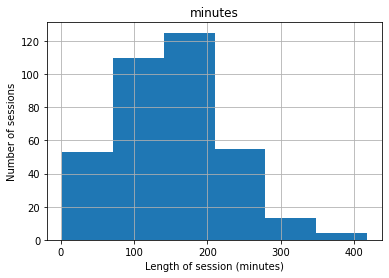

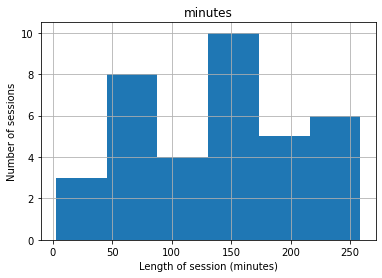

In [47]:
dropdown_timeframe_histsess = widgets.Dropdown(
       options=['Day', 'Week', 'Month', 'Year', 'All Time'],
       description='Timeframe:')

a = df['userId'].unique()
a = np.append(['All'], a)

dropdown_user_histsess = widgets.Dropdown(
       options=a,
       value='All',
       description='User ID(s):')
       
output_widget_histsess = widgets.Output()

today = dt.datetime.now()
timeframe_ago = dt.datetime(1970, 1, 1)


def dropdown_timeframe_eventhandler_histsess(change):
    common_filtering_histsess(change.new, dropdown_user_histsess.value)

def dropdown_user_eventhandler_histsess(change):
    common_filtering_histsess(dropdown_timeframe_histsess.value, change.new)
    
def common_filtering_histsess(timeframe, user):
    output_widget_histsess.clear_output()
    
    #timeframe
    if timeframe == 'Day':
        timeframe_ago = dt.datetime(today.year, today.month, day=today.day)
    elif timeframe == 'Week':
        idx = (today.weekday() + 1) % 7 # MON = 0, SUN = 6 -> SUN = 0 .. SAT = 6
        last_sun = today - dt.timedelta(7+idx-6)
        timeframe_ago = dt.datetime(last_sun.year, last_sun.month, day=last_sun.day)
    elif timeframe == 'Month':
        timeframe_ago = dt.datetime(today.year, today.month, day=1)
    elif timeframe == 'Year':
        timeframe_ago = dt.datetime(today.year, 1, day=1)
    else:
        timeframe_ago = dt.datetime(1970, 1, 1)
    df_processed_timeframed = df_processed.drop(df_processed[df_processed.date < timeframe_ago.date()].index)
    df_timeframed = df.drop(df[pd.to_datetime(df.timestamp) < timeframe_ago].index)
    df_timeframed['week_number'] = [dt.datetime.strptime(str(d), '%Y-%m-%d %H:%M:%S').isocalendar()[1] for d in df_timeframed['timestamp']]
    
    #user
    df_processed_user_timeframed = df_processed_timeframed
    df_user_timeframed = df_timeframed
    
    if user != 'All':
        dftemp = df_processed_timeframed
        df_processed_user_timeframed = dftemp.drop(dftemp[dftemp.userId != str(user)].index)
        df_user_timeframed = df_timeframed.drop(df_timeframed[df_timeframed.userId != str(user)].index)
    
    with output_widget_histsess:
        df_sesh_len_hist = df_processed_user_timeframed[['duration']].copy()
        df_sesh_len_hist['minutes'] = [d.total_seconds()/60 for d in df_processed_user_timeframed['duration']]
        df_min_hist = df_sesh_len_hist[['minutes']].copy()
        axarr = df_min_hist.hist(bins=6)

        for ax in axarr.flatten():
            ax.set_xlabel("Length of session (minutes)")
            ax.set_ylabel("Number of sessions")
        
        display(axarr)

dropdown_timeframe_histsess.observe(dropdown_timeframe_eventhandler_histsess, names='value')
dropdown_user_histsess.observe(dropdown_user_eventhandler_histsess, names='value')
display(dropdown_timeframe_histsess)
display(dropdown_user_histsess)

## Radar graph showing average ratings for each category

In [48]:
import ast

df_rating_cat_grouped = None

dropdown_timeframe_radarrating = widgets.Dropdown(
       options=['Day', 'Week', 'Month', 'Year', 'All Time'],
       description='Timeframe:')

a = df['userId'].unique()
a = np.append(['All'], a)

dropdown_user_radarrating = widgets.Dropdown(
       options=a,
       value='All',
       description='User ID(s):')
       
output_widget_radarrating = widgets.Output()

today = dt.datetime.now()
timeframe_ago = dt.datetime(1970, 1, 1)


def dropdown_timeframe_eventhandler_radarrating(change):
    common_filtering_radarrating(change.new, dropdown_user_radarrating.value)

def dropdown_user_eventhandler_radarrating(change):
    common_filtering_radarrating(dropdown_timeframe_radarrating.value, change.new)
    
def common_filtering_radarrating(timeframe, user):
    output_widget_radarrating.clear_output()
    
    #timeframe
    if timeframe == 'Day':
        timeframe_ago = dt.datetime(today.year, today.month, day=today.day)
    elif timeframe == 'Week':
        idx = (today.weekday() + 1) % 7 # MON = 0, SUN = 6 -> SUN = 0 .. SAT = 6
        last_sun = today - dt.timedelta(7+idx-6)
        timeframe_ago = dt.datetime(last_sun.year, last_sun.month, day=last_sun.day)
    elif timeframe == 'Month':
        timeframe_ago = dt.datetime(today.year, today.month, day=1)
    elif timeframe == 'Year':
        timeframe_ago = dt.datetime(today.year, 1, day=1)
    else:
        timeframe_ago = dt.datetime(1970, 1, 1)
    df_processed_timeframed = df_processed.drop(df_processed[df_processed.date < timeframe_ago.date()].index)
    df_timeframed = df.drop(df[pd.to_datetime(df.timestamp) < timeframe_ago].index)
    df_timeframed['week_number'] = [dt.datetime.strptime(str(d), '%Y-%m-%d %H:%M:%S').isocalendar()[1] for d in df_timeframed['timestamp']]
    
    #user
    df_processed_user_timeframed = df_processed_timeframed
    df_user_timeframed = df_timeframed
    
    if user != 'All':
        dftemp = df_processed_timeframed
        df_processed_user_timeframed = dftemp.drop(dftemp[dftemp.userId != str(user)].index)
        df_user_timeframed = df_timeframed.drop(df_timeframed[df_timeframed.userId != str(user)].index)
    
    with output_widget_radarrating:
        df_rating = df_user_timeframed.drop(df_user_timeframed[df_user_timeframed['type'] != "CORE_SCENE_RATE"].index)
        df_rating['data_str'] = [ast.literal_eval(str(d)) for d in df_rating['data']]
        df_rating['ratingValue'] = [d['ratingValue'] for d in df_rating['data_str']]
        df_rating['ratingCategory'] = [d['ratingCategory'] for d in df_rating['data_str']]
        df_rating = df_rating.drop('data', axis=1)
        df_rating = df_rating.drop('data_str', axis=1)
        df_rating_cat_grouped = pd.DataFrame({'mean' : df_rating.groupby(["ratingCategory"])['ratingValue'].mean()}).reset_index()
        fig = plt.figure()
        ax = fig.add_subplot(111, projection="polar")

        # theta has 5 different angles, and the first one repeated
        theta = np.arange(len(df_rating_cat_grouped) + 1) / float(len(df_rating_cat_grouped)) * 2 * np.pi
        # values has the 5 values from 'mean', with the first element repeated
        values = df_rating_cat_grouped['mean'].values
        values = np.append(values, values[0])

        # draw the polygon and the mark the points for each angle/value combination
        l1, = ax.plot(theta, values, color="C2", marker="o", label="Mean rating")
        plt.xticks(theta[:-1], df_rating_cat_grouped['ratingCategory'], color='grey', size=12)
        ax.tick_params(pad=10) # to increase the distance of the labels to the plot
        # fill the area of the polygon with green and some transparency
        ax.fill(theta, values, 'green', alpha=0.1)

        # plt.legend() # shows the legend, using the label of the line plot (useful when there is more than 1 polygon)
        plt.title("Average Ratings for Different Categories")
        
        display(plt.show())
        display(df_rating_cat_grouped)

dropdown_timeframe_radarrating.observe(dropdown_timeframe_eventhandler_radarrating, names='value')
dropdown_user_radarrating.observe(dropdown_user_eventhandler_radarrating, names='value')
display(dropdown_timeframe_radarrating)
display(dropdown_user_radarrating)

Dropdown(description='Timeframe:', options=('Day', 'Week', 'Month', 'Year', 'All Time'), value='Day')

Dropdown(description='User ID(s):', options=('All', '12367640-999d-4dc8-b121-ecb7f144071a', 'f1f86bb6-27b3-4c1…

In [49]:
display(output_widget_radarrating)

Output()

In [50]:
df_rating_cat_grouped